# The Thematic map

In [331]:
import geopandas as gpd

linkGit = 'https://github.com/Spatial-Data-Analytics-DACSS-690D/HW1-Interactive-Visualization/raw/refs/heads/main/'
linkWorldMaps = 'WORLD/worldMaps.gpkg'

We can easily find out the layers in that geopackage file (**worldMaps.gpkg**):

In [332]:
gpd.list_layers(linkGit + linkWorldMaps)

,name,geometry_type
0,rivers,MultiLineString
1,cities,Point
2,countries,MultiPolygon


For the thematics we will retrieve only one layer (map):

In [333]:
countries = gpd.read_file(linkGit + linkWorldMaps, layer='countries')

# see some
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"MULTIPOLYGON (((-69.88223 12.41111, -69.94695 ..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
3,Algeria,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"MULTIPOLYGON (((34.21807 9.96458, 34.20722 9.9..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"MULTIPOLYGON (((-68.96556 12.19889, -68.91196 ..."


As you see, the GDF above has just two colums; enough to plot a map, but no more than that.

Let me open a DF:

In [334]:
import pandas as pd

someDataLink = 'WORLD/some_dataworld.csv'

someData = pd.read_csv(linkGit + someDataLink)

## data available
someData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       172 non-null    object 
 1   iso2          171 non-null    object 
 2   iso3          172 non-null    object 
 3   region        172 non-null    object 
 4   fragility     172 non-null    float64
 5   co2           172 non-null    int64  
 6   sq_km         172 non-null    int64  
 7   num_airports  172 non-null    int64  
 8   population    172 non-null    int64  
 9   mobiles       172 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 13.6+ KB


## Pre Processing: Merging

The DF has some interesting numerical data (_float64_):
* fragility: fragility index 2023 -[details here](https://fragilestatesindex.org/2023/06/14/fragile-states-index-2023-annual-report/)
* co2: metric tonnes of CO2 emmitted -[details here](https://www.cia.gov/the-world-factbook/field/carbon-dioxide-emissions/country-comparison/)
* sq_km: country area -[details here](https://www.cia.gov/the-world-factbook/field/area/country-comparison/)
* num_airports: count of airports in the country -[details here](https://www.cia.gov/the-world-factbook/field/airports/country-comparison/)
* mobiles: country mobiles  -[details here](https://www.cia.gov/the-world-factbook/field/mobiles/country-comparison/)
* mobiles: total number of mobile cellular telephone subscribers -[details here](https://www.cia.gov/the-world-factbook/field/telephones-mobile-cellular/country-comparison/)

There are also other columns that may be of help:

In [335]:
someData.head()

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles
0,AFGHANISTAN,AF,AFG,SOUTH ASIA,105.0,7893000,652230,68,40121552,23000000
1,ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000
2,ALGERIA,DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000
3,ANGOLA,AO,AGO,AFRICA,87.8,19362000,1246700,107,37202061,25700000
4,ANTIGUA AND BARBUDA,AG,ATG,CENTRAL AMERICA AND THE CARIBBEAN,54.4,729000,443,4,102634,184000


Preparing thematic maps requires **social data** about the geometry (line, polygon, point). The "countries" geoDF has no social data, so the preprocessing requires merging the DF into the GDF.

Merging is not a trivial process. For this case, it will even require fuzzy merging. You may see the full mergin process in this [GoogleColab notebook](https://colab.research.google.com/drive/1iGTr8z1Bo8sitgg7uNcKh33pwleymb8O?usp=sharing).

We will use the file produced by that colab notebook

In [336]:
linkToIndicators = "https://github.com/DACSS-Spatial/data_forSpatial/raw/refs/heads/main/WORLD/worldindicators.json"
theMapAndData = gpd.read_file(linkToIndicators)
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Country       172 non-null    object  
 1   iso2          171 non-null    object  
 2   iso3          172 non-null    object  
 3   region        172 non-null    object  
 4   fragility     172 non-null    float64 
 5   co2           172 non-null    int64   
 6   sq_km         172 non-null    int32   
 7   num_airports  172 non-null    int32   
 8   population    172 non-null    int32   
 9   mobiles       172 non-null    int32   
 10  geometry      172 non-null    geometry
dtypes: float64(1), geometry(1), int32(4), int64(1), object(4)
memory usage: 12.2+ KB


In [337]:
theMapAndData

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
0,ANTIGUA AND BARBUDA,AG,ATG,CENTRAL AMERICA AND THE CARIBBEAN,54.4,729000,443,4,102634,184000,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
1,AFGHANISTAN,AF,AFG,SOUTH ASIA,105.0,7893000,652230,68,40121552,23000000,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
2,ALGERIA,DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
3,AZERBAIJAN,AZ,AZE,MIDDLE EAST,73.2,35389000,86600,32,10650239,11000000,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
4,ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,"MULTIPOLYGON (((20.79192 40.43154, 20.78722 40..."
...,...,...,...,...,...,...,...,...,...,...,...
167,ZAMBIA,ZM,ZMB,AFRICA,85.7,6798000,752618,120,20799116,21200000,"MULTIPOLYGON (((30.21302 -14.98172, 30.21917 -..."
168,ZIMBABWE,ZW,ZWE,AFRICA,99.5,7902000,390757,144,17150352,15000000,"MULTIPOLYGON (((32.48888 -21.34445, 32.46541 -..."
169,SOUTH SUDAN,SS,SSD,AFRICA,112.2,1778000,644329,89,12703714,6170000,"MULTIPOLYGON (((34.21807 9.96458, 34.20722 9.9..."
170,INDONESIA,ID,IDN,EAST AND SOUTHEAST ASIA,70.4,563543000,1904569,556,281562465,352000000,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."


As you see, the columns from the DF (someData) are now part of the GDF (countries), that is now in this new GDF **theMapAndData**.

# Thematics: the DDM (Dot Density Map)

You have a DDM if you use **dots** to show comparatively which polygon of a map has 'more' (or 'less') of some countable phenomenon of interest.
A dot is an aggregated value, but it is constant for each dot.

We have the world map, let's see the regions we have:

In [338]:
theMapAndData.region.value_counts()

,count
region,
AFRICA,52
EUROPE,37
MIDDLE EAST,16
CENTRAL AMERICA AND THE CARIBBEAN,16
EAST AND SOUTHEAST ASIA,15
SOUTH AMERICA,12
SOUTH ASIA,8
AUSTRALIA AND OCEANIA,7
CENTRAL ASIA,6


### Preprocessing: Filtering

Let's keep europe for this session:

<Axes: >

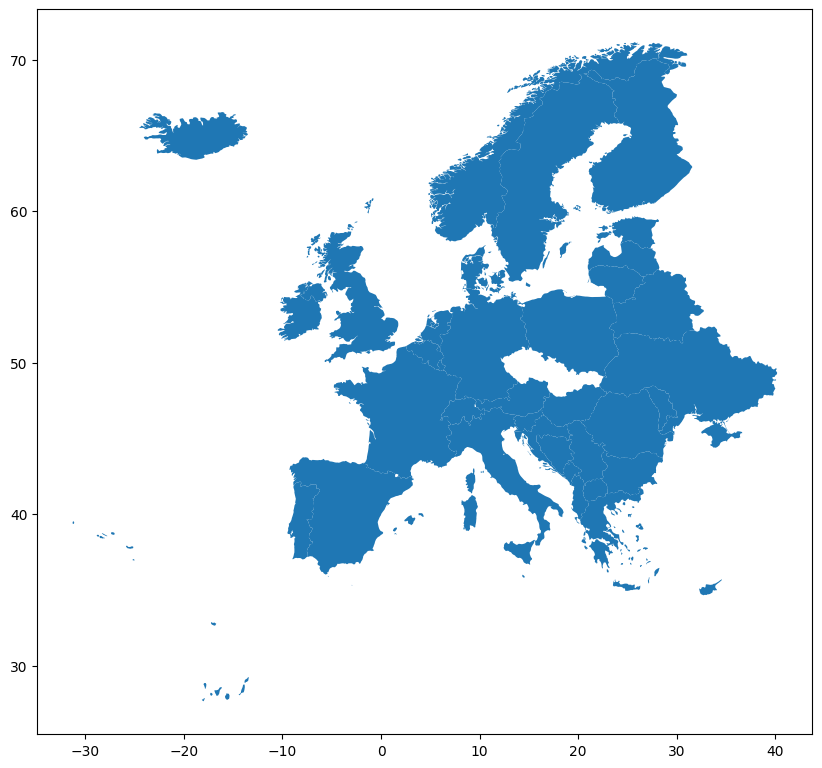

In [339]:
europe = theMapAndData[theMapAndData.region=='EUROPE']
europe.plot()

**What variable to use?** Let's go with mobiles (countable).

A DDM can serve as an effective way to show the distribution of people. The most critical tasks are:

* Unit per Dot: Deciding how many people each dot should represent is key for visual clarity. This value should be chosen carefully to avoid oversaturation or sparsity.

* Dot Placement: The dots should be randomly distributed within each polygon to avoid misrepresenting the data.

Every dot represents the same amount, then a DDM uses raw counts (non-normalized). The size of all dots on the map are the same, which  ensures a consistent visual comparison.

### Preprocessing: NEW UNIT

How many people will the dot represent? There is some **trial and error** to make this decision, but it helps exploring the variable descriptives.

In [340]:
print(europe.mobiles.describe().to_string(float_format=lambda x: f'{x:.0f}'))

count          37
mean     19578054
std      27722840
min        478000
25%       2730000
50%       8010000
75%      14800000
max     105000000


From what we see, we should not choose 400 000 as the unit per dot. At least one country will have zero dots. Then, the trial and error is about choosing values like 25 000, 50 000, 100 000, etc., but below 478000.

If we chose 25000, this would be the amount of points within each polygon (country):

In [341]:
(europe.set_index("Country").mobiles / 50000).astype(int).sort_values()

,mobiles
Country,
ICELAND,9
MALTA,14
LUXEMBOURG,19
MONTENEGRO,26
CYPRUS,28
MACEDONIA,38
ESTONIA,41
LATVIA,45
ALBANIA,52


This is a safe option (no zeroes).

### Preprocessing: NEW LAYER

We need to create a map of dots, a new layer. The source will be the europe polygons we currently have. Let's do that first:

In [342]:
# a copy of europe
temporal_gdf = europe.copy()
temporal_gdf.head()

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
4,ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,"MULTIPOLYGON (((20.79192 40.43154, 20.78722 40..."
9,AUSTRIA,AT,AUT,EUROPE,25.0,65540000,83871,62,8967982,11100000,"MULTIPOLYGON (((10.47124 46.87135, 10.48821 46..."
13,BELGIUM,BE,BEL,EUROPE,28.6,128247000,30528,48,11977634,12100000,"MULTIPOLYGON (((6.3982 50.32317, 6.34972 50.31..."
17,BOSNIA AND HERZEGOVINA,BA,BIH,EUROPE,71.3,16209000,51197,20,3798671,3870000,"MULTIPOLYGON (((17.64984 42.88908, 17.57853 42..."
20,BELARUS,BY,BLR,EUROPE,68.2,54695000,207600,46,9501451,11800000,"MULTIPOLYGON (((25.54667 51.92213, 25.43999 51..."


the GeoDF **temporal_gdf** is just an independent copy of europe, as you see all the geometries are MULTIPOLYGONS still. Let me replace the row names by the country name:

In [343]:
# the row names will be the country
temporal_gdf.set_index('Country',inplace = True)

# we have this now
temporal_gdf.head()

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
Country,,,,,,,,,,
ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,"MULTIPOLYGON (((20.79192 40.43154, 20.78722 40..."
AUSTRIA,AT,AUT,EUROPE,25.0,65540000,83871,62,8967982,11100000,"MULTIPOLYGON (((10.47124 46.87135, 10.48821 46..."
BELGIUM,BE,BEL,EUROPE,28.6,128247000,30528,48,11977634,12100000,"MULTIPOLYGON (((6.3982 50.32317, 6.34972 50.31..."
BOSNIA AND HERZEGOVINA,BA,BIH,EUROPE,71.3,16209000,51197,20,3798671,3870000,"MULTIPOLYGON (((17.64984 42.88908, 17.57853 42..."
BELARUS,BY,BLR,EUROPE,68.2,54695000,207600,46,9501451,11800000,"MULTIPOLYGON (((25.54667 51.92213, 25.43999 51..."


Let's create **dots_per_country**, the column that represents the amount of dots for each country (like we saw before):

In [344]:
# creating  column
temporal_gdf['dots_per_country'] = (europe['mobiles'] / 50000).astype(int).values # notice .values!

# see
temporal_gdf['dots_per_country'].head(10)

,dots_per_country
Country,
ALBANIA,52
AUSTRIA,222
BELGIUM,242
BOSNIA AND HERZEGOVINA,77
BELARUS,236
BULGARIA,160
CYPRUS,28
DENMARK,150
IRELAND,115


Let's find a **random_location** for the dots:

In [345]:
# enter 'sample_points()'
temporal_gdf.sample_points(size = temporal_gdf['dots_per_country'],rng = 123).head(10)

,sampled_points
Country,
ALBANIA,"MULTIPOINT ((19.35646 41.98905), (19.43041 42...."
AUSTRIA,"MULTIPOINT ((9.59842 47.50867), (9.81734 47.05..."
BELGIUM,"MULTIPOINT ((2.61787 51.04543), (2.62742 51.06..."
BOSNIA AND HERZEGOVINA,"MULTIPOINT ((15.79837 44.88414), (15.82684 44...."
BELARUS,"MULTIPOINT ((23.30801 52.28336), (23.83898 52...."
BULGARIA,"MULTIPOINT ((22.55896 42.42457), (22.5684 43.7..."
CYPRUS,"MULTIPOINT ((32.30436 35.03976), (32.60576 34...."
DENMARK,"MULTIPOINT ((8.15207 56.44488), (8.19904 55.78..."
IRELAND,"MULTIPOINT ((-10.12541 51.85102), (-10.08608 5..."


That was a critical step, you created a...

In [346]:
type(temporal_gdf.sample_points(size = temporal_gdf['dots_per_country'],rng = 123))

geopandas.geoseries.GeoSeries

Take a look at one of this series' element:

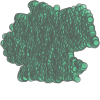

In [347]:
# this is the case of Comoros:
temporal_gdf.sample_points(size = temporal_gdf['dots_per_country'],rng = 123).loc['GERMANY']

As usual, that GeoS is turned into a GeoDF:

In [348]:
europe_dots = gpd.GeoDataFrame(geometry = temporal_gdf.sample_points(size = temporal_gdf['dots_per_country'],rng = 123))
europe_dots.head(10)

,geometry
Country,
ALBANIA,"MULTIPOINT ((19.35646 41.98905), (19.43041 42...."
AUSTRIA,"MULTIPOINT ((9.59842 47.50867), (9.81734 47.05..."
BELGIUM,"MULTIPOINT ((2.61787 51.04543), (2.62742 51.06..."
BOSNIA AND HERZEGOVINA,"MULTIPOINT ((15.79837 44.88414), (15.82684 44...."
BELARUS,"MULTIPOINT ((23.30801 52.28336), (23.83898 52...."
BULGARIA,"MULTIPOINT ((22.55896 42.42457), (22.5684 43.7..."
CYPRUS,"MULTIPOINT ((32.30436 35.03976), (32.60576 34...."
DENMARK,"MULTIPOINT ((8.15207 56.44488), (8.19904 55.78..."
IRELAND,"MULTIPOINT ((-10.12541 51.85102), (-10.08608 5..."


Now you have a GDF:

In [349]:
europe_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 37 entries, ALBANIA to UKRAINE
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  37 non-null     geometry
dtypes: geometry(1)
memory usage: 1.6+ KB


Here is our DDM:

<Axes: >

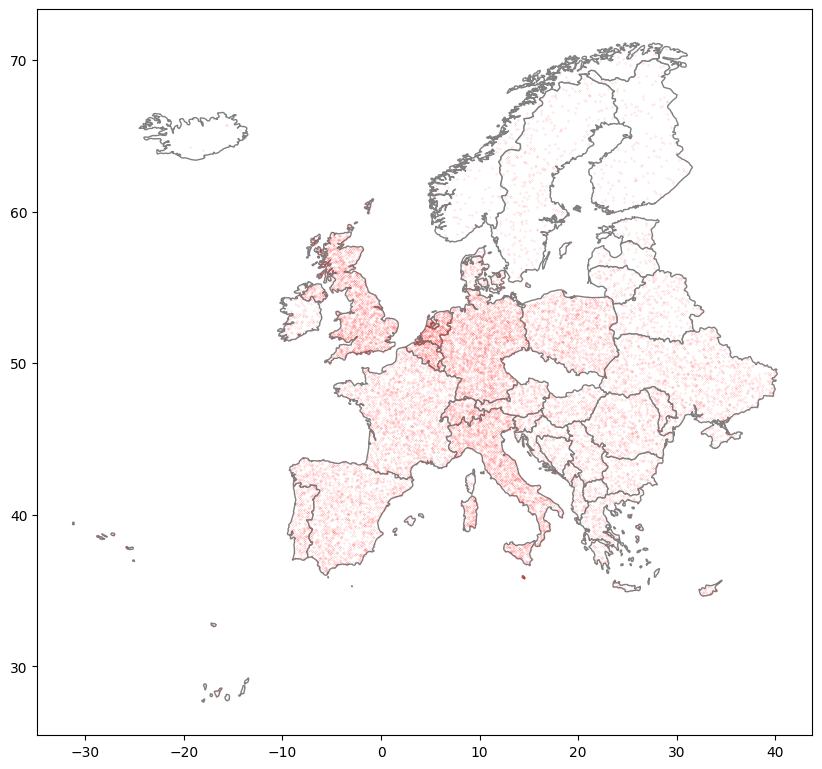

In [350]:
base = europe.plot(facecolor = "white",#color of polygon fill
               edgecolor = 'grey') #color of border
europe_dots.plot(markersize = 0.02, color = 'red',ax = base, alpha = 0.5)

It is generally recommended that DDMs use an **equal-area projection**, which benefits density and limits area distortion.

In [351]:
europe_8857 = europe.to_crs(8857)
europe_dots_8857 = europe_dots.to_crs(8857)

<Axes: >

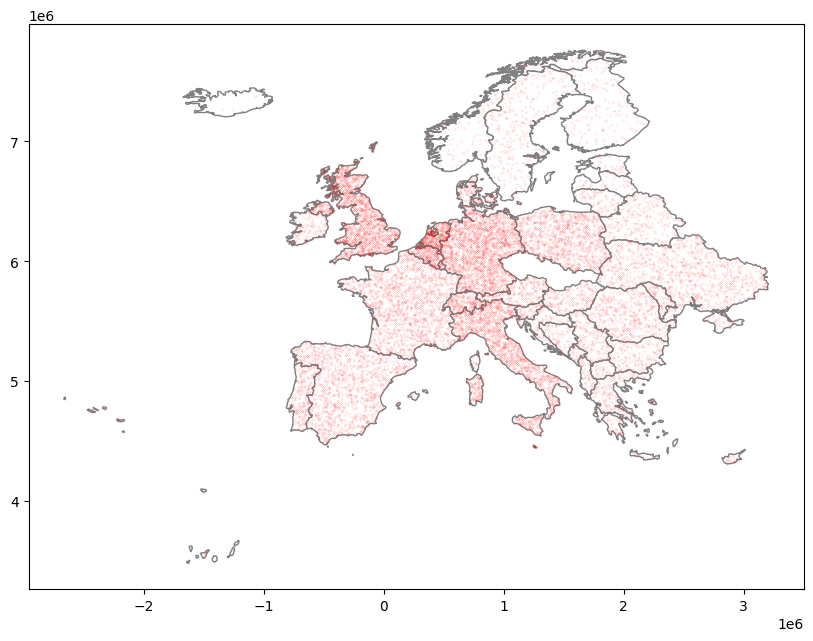

In [352]:
# new version
base = europe_8857.plot(facecolor = "white",
                              edgecolor = 'grey')
europe_dots_8857.plot(markersize = 0.02, color = 'red',ax = base, alpha = 0.5)

### Exporting to R?

europe_dots_8857 has a column of multi-points as we know. Shapefiles can not deal with this structure not visual programs in R such as **leaflet**. Then, we need to split those multipoints using **explode()**:

In [353]:
europe_dots_8857.explode()

,geometry
Country,
ALBANIA,POINT (1623974.793 5141115.525)
ALBANIA,POINT (1627511.645 5168246.822)
ALBANIA,POINT (1657773.251 4952869.274)
ALBANIA,POINT (1639599.104 5142642.107)
ALBANIA,POINT (1636343.861 5181493.967)
...,...
UKRAINE,POINT (3197661.917 5789413.068)
UKRAINE,POINT (3171197.372 5907668.358)
UKRAINE,POINT (3163892.857 5938973.06)


We may just need to get rid of the indexes:

In [354]:
europe_dots_8857.explode(ignore_index=True)

,geometry
0,POINT (1623974.793 5141115.525)
1,POINT (1627511.645 5168246.822)
2,POINT (1657773.251 4952869.274)
3,POINT (1639599.104 5142642.107)
4,POINT (1636343.861 5181493.967)
...,...
14475,POINT (3197661.917 5789413.068)
14476,POINT (3171197.372 5907668.358)
14477,POINT (3163892.857 5938973.06)
14478,POINT (3169988.011 5925237.337)


The function **explodes()** returns...

In [355]:
type(europe_dots_8857.explode(ignore_index=True))

geopandas.geodataframe.GeoDataFrame

This is a safe option outside Python:

In [356]:
# then
europe_dots_8857=europe_dots_8857.explode(ignore_index=True)

# Thematics: the PSM (Proportional Symbol Map)

You have a PSM if you use a symbol (generally a circle) to show the distribution of a variable per location.
The symbol is an aggregated raw value, and its size varies according to those values. So now we need:

### Preprocessing: scale the variable to determine size

How to adjust the size of a symbols based of mobiles? We should not have symbol size five million!

In [357]:
##what about square root scaling
import numpy as np

max_size=40
min_size=1
scaled_sizes = np.sqrt(
    (europe_8857.mobiles - europe_8857.mobiles.min()) / (europe_8857.mobiles.max() - europe_8857.mobiles.min())
) * (max_size-1) + min_size

scaled_sizes.sort_values()

,mobiles
72,1.000000
104,2.985845
93,3.651150
107,4.479545
43,4.722024
99,5.580822
51,5.782853
89,6.092307
4,6.569989
136,6.724597


### Preprocessing: create new layer

Similar to DDM, the PSM is a new layer, built from the original polygons:

In [358]:
europe_8857_symbols = europe_8857.copy()
europe_8857_symbols.set_index('Country',inplace=True)

#this is just a copy (new index names)
europe_8857_symbols.head()

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
Country,,,,,,,,,,
ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,"MULTIPOLYGON (((1762019.912 4969086.868, 17620..."
AUSTRIA,AT,AUT,EUROPE,25.0,65540000,83871,62,8967982,11100000,"MULTIPOLYGON (((848806.079 5664481.706, 849768..."
BELGIUM,BE,BEL,EUROPE,28.6,128247000,30528,48,11977634,12100000,"MULTIPOLYGON (((504792.711 6018351.977, 501010..."
BOSNIA AND HERZEGOVINA,BA,BIH,EUROPE,71.3,16209000,51197,20,3798671,3870000,"MULTIPOLYGON (((1471923.284 5239454.441, 14654..."
BELARUS,BY,BLR,EUROPE,68.2,54695000,207600,46,9501451,11800000,"MULTIPOLYGON (((1988859.598 6177245.875, 19805..."


Let's set the **size** of the symbol:

In [359]:
europe_8857_symbols['size']=scaled_sizes.values # notice .values!

### Preprocessing: location for the symbol

We need one symbol per polygon, an obvious choice is the centroid.

In [360]:
# europe_8857_locations will have a new geometry:
europe_8857_symbols['geometry'] = europe_8857_symbols['geometry'].centroid

# see the geom is NOW a POINT
europe_8857_symbols

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,size
Country,,,,,,,,,,,
ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,POINT (1693159.081 5046716.937),6.569989
AUSTRIA,AT,AUT,EUROPE,25.0,65540000,83871,62,8967982,11100000,POINT (1139084.682 5738721.46),13.432656
BELGIUM,BE,BEL,EUROPE,28.6,128247000,30528,48,11977634,12100000,POINT (367404.599 6049858.689),14.004725
BOSNIA AND HERZEGOVINA,BA,BIH,EUROPE,71.3,16209000,51197,20,3798671,3870000,POINT (1470719.691 5376930.605),8.025685
BELARUS,BY,BLR,EUROPE,68.2,54695000,207600,46,9501451,11800000,POINT (2152665.988 6330683.328),13.835782
BULGARIA,BG,BGR,EUROPE,50.6,38373000,110879,107,6782659,8010000,POINT (2105659.252 5224435.796),11.469258
CYPRUS,CY,CYP,EUROPE,57.8,8024000,9251,14,1320525,1430000,POINT (2905095.945 4357540.615),4.722024
DENMARK,DK,DNK,EUROPE,19.5,33850000,43094,102,5973136,7500000,POINT (755410.706 6561637.714),11.108604
IRELAND,IE,IRL,EUROPE,20.6,35475000,70273,100,5233461,5760000,POINT (-628187.544 6297302.767),9.767181


We got the basics, then:

<Axes: >

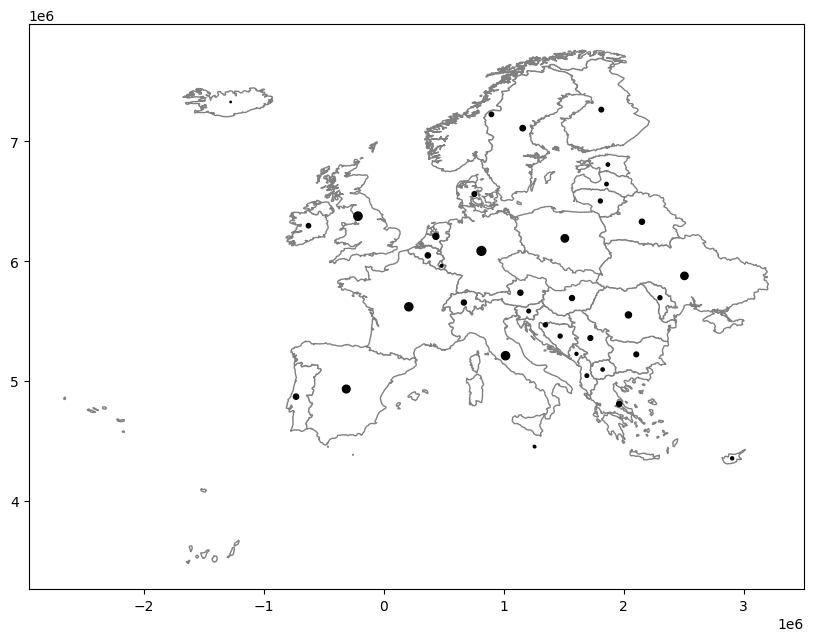

In [361]:
base=europe_8857.plot(facecolor="white",
                      edgecolor='grey')
# Plot the centroids on top
europe_8857_symbols.plot(
    ax=base,
    markersize=europe_8857_symbols['size'],
    color='black'
)

Keep in mind that the standard way of computing centroids may bring some trouble if you have multipolygons (archipelagos?). Let´s plot Seychelles:

In [390]:
!pip install mapclassify
import matplotlib, mapclassify
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
base = europe_8857[europe_8857.Country=="ITALY"].explore()
europe_8857_symbols[europe_8857_symbols.index == "ITALY"].explore(m = base,color = "red")

/tmp/ipython-input-236493565.py:5: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  europe_8857_symbols[europe_8857_symbols.index == "ITALY"].explore(m = base,color = "red")


The location is nowhere within a polygon. An  alternative is **representative_point()**:

In [363]:
# replace the points
europe_8857_symbols["geometry"]=europe_8857.representative_point().values

We will keep that last result.

In [391]:
base=europe_8857[europe_8857.Country=="ITALY"].explore()
europe_8857_symbols[europe_8857_symbols.index=="ITALY"].explore(m=base,color="red")

/tmp/ipython-input-738295352.py:2: UserWarning: The GeoSeries you are attempting to plot is composed of empty geometries. Nothing has been displayed.
  europe_8857_symbols[europe_8857_symbols.index=="ITALY"].explore(m=base,color="red")


### Preprocessing: detect outliers

PPMs are not thematic maps to see precise values, but to reveal clear differences on the variable distribution used. As human eyes are very limited to detect area differences, we may need to use some other tactics to confirm if we have outliers:

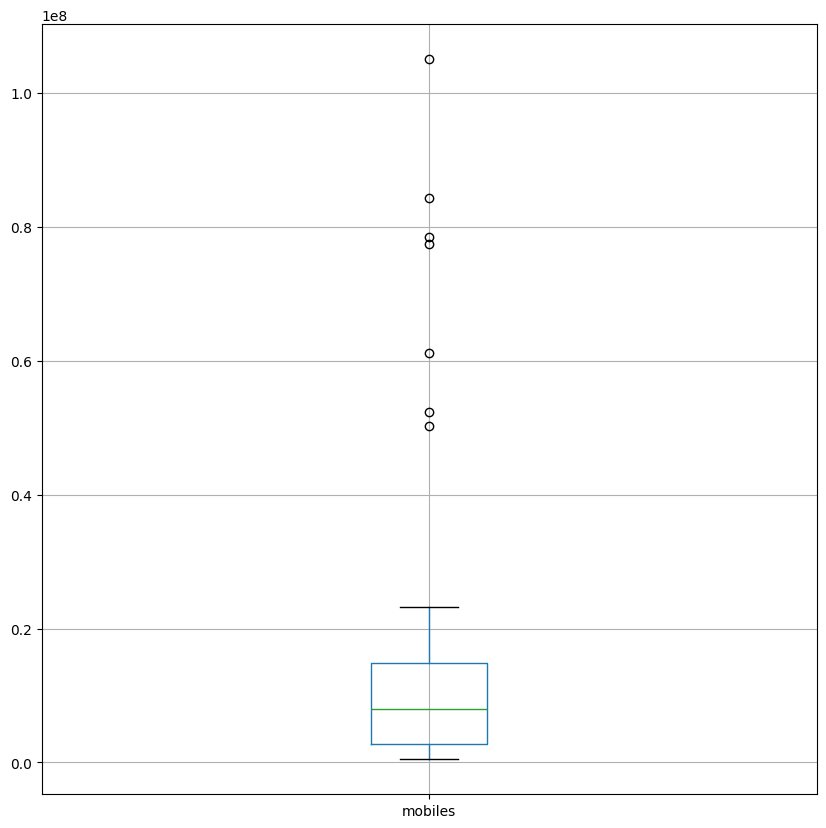

In [365]:
boxplotInfo=europe_8857_symbols.boxplot(column='mobiles',return_type="dict")

The object **boxplotInfo** showed the boxplot, and we confirm there are outliers. We can recover them like this:

In [366]:
outliers=boxplotInfo['fliers'][0].get_ydata()
## see
outliers

array([77400000, 105000000, 78500000, 52400000, 61200000, 84300000,
       50300000], dtype=object)

Then, these are the outlying countries:

In [367]:
europe_8857_symbols[europe_8857_symbols.mobiles.isin(outliers)].index

Index(['FRANCE', 'GERMANY', 'ITALY', 'POLAND', 'SPAIN', 'UNITED KINGDOM',
       'UKRAINE'],
      dtype='object', name='Country')

Knowing this information, we can create a column as outlier flag:

In [368]:
europe_8857_symbols['mobiles_outlier']=europe_8857_symbols.mobiles.isin(outliers)*1

## see
europe_8857_symbols

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,size,mobiles_outlier
Country,,,,,,,,,,,,
ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,POINT (1690025.667 5046293.422),6.569989,0
AUSTRIA,AT,AUT,EUROPE,25.0,65540000,83871,62,8967982,11100000,POINT (1189005.238 5751150.548),13.432656,0
BELGIUM,BE,BEL,EUROPE,28.6,128247000,30528,48,11977634,12100000,POINT (387446.908 6036496.1),14.004725,0
BOSNIA AND HERZEGOVINA,BA,BIH,EUROPE,71.3,16209000,51197,20,3798671,3870000,POINT (1491210.326 5347411.975),8.025685,0
BELARUS,BY,BLR,EUROPE,68.2,54695000,207600,46,9501451,11800000,POINT (2149614.456 6346565.463),13.835782,0
BULGARIA,BG,BGR,EUROPE,50.6,38373000,110879,107,6782659,8010000,POINT (2101087.263 5224181.305),11.469258,0
CYPRUS,CY,CYP,EUROPE,57.8,8024000,9251,14,1320525,1430000,POINT (2918367.222 4371224.891),4.722024,0
DENMARK,DK,DNK,EUROPE,19.5,33850000,43094,102,5973136,7500000,POINT (700022.291 6560206.594),11.108604,0
IRELAND,IE,IRL,EUROPE,20.6,35475000,70273,100,5233461,5760000,POINT (-606357.014 6319572.025),9.767181,0


We can use that like this:

<Axes: >

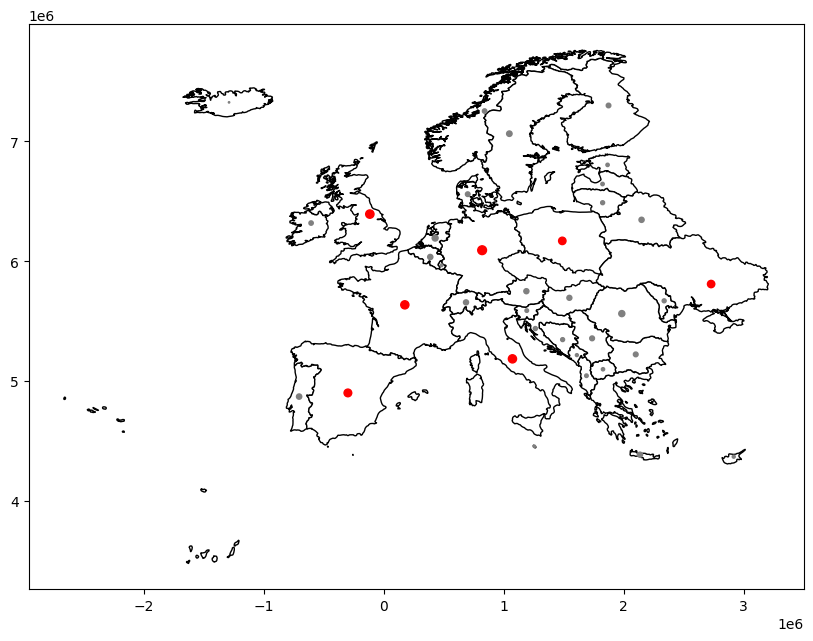

In [369]:
base = europe_8857.plot(color='white', edgecolor='black', figsize=(10,10))

# Define your color map
mapcolor = {1: 'red', 0: 'grey'}

# Plot the centroids on top
europe_8857_symbols.plot(
    ax=base,
    markersize=europe_8857_symbols['size'],
    color=europe_8857_symbols['mobiles_outlier'].map(mapcolor)
)

## Exporting to R?

It is **almost** ready. R will use the new layer and the location of the points. However, R's ggplot needs NOT your size variable. Give GGPLOT the _mobiles_ variables and use **scale_size_area()** to manage the size and the legend.

Also, notice that I have the country names as index, and the other columns might be redundant (they are in **europe_8857**):

In [370]:
europe_8857_symbols.head()

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,size,mobiles_outlier
Country,,,,,,,,,,,,
ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,POINT (1690025.667 5046293.422),6.569989,0
AUSTRIA,AT,AUT,EUROPE,25.0,65540000,83871,62,8967982,11100000,POINT (1189005.238 5751150.548),13.432656,0
BELGIUM,BE,BEL,EUROPE,28.6,128247000,30528,48,11977634,12100000,POINT (387446.908 6036496.1),14.004725,0
BOSNIA AND HERZEGOVINA,BA,BIH,EUROPE,71.3,16209000,51197,20,3798671,3870000,POINT (1491210.326 5347411.975),8.025685,0
BELARUS,BY,BLR,EUROPE,68.2,54695000,207600,46,9501451,11800000,POINT (2149614.456 6346565.463),13.835782,0


In [371]:
## then
europe_8857_symbols.reset_index(drop=False, inplace=True)
europe_8857_symbols.drop(columns=['iso2', 'region', 'fragility', 'co2', 'sq_km', 'num_airports','population'], inplace=True)

## final for R:
europe_8857_symbols.head()

,Country,iso3,mobiles,geometry,size,mobiles_outlier
0,ALBANIA,ALB,2610000,POINT (1690025.667 5046293.422),6.569989,0
1,AUSTRIA,AUT,11100000,POINT (1189005.238 5751150.548),13.432656,0
2,BELGIUM,BEL,12100000,POINT (387446.908 6036496.1),14.004725,0
3,BOSNIA AND HERZEGOVINA,BIH,3870000,POINT (1491210.326 5347411.975),8.025685,0
4,BELARUS,BLR,11800000,POINT (2149614.456 6346565.463),13.835782,0


Done!

# Thematics: Choropleths

Notice that we do not normalized DDMs nor PSMs: data is just a count or a representation of counts. Choropleths will 'paint' the whole polygon and as noticed in PSMs, we have to be very careful when using color in shape, as the area itself is a confounding. To control this visual artifact, the variable must be normalized, that is, divided by a value correlated with the area.

Then, for this course, a choropleth is a normalized representation of data.

Following our definition:

* This is **NOT** a choropleth:


<Axes: >

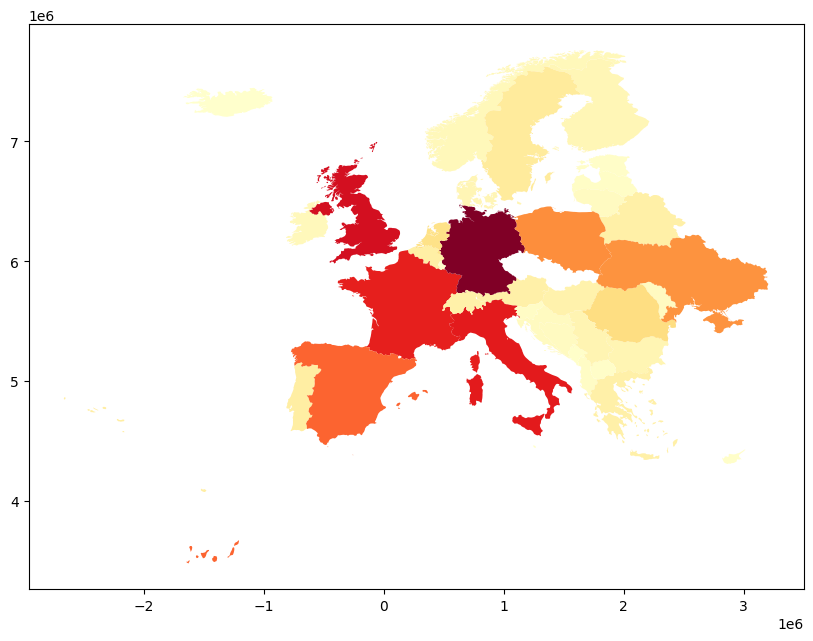

In [372]:
europe_8857.plot(europe_8857.mobiles,cmap="YlOrRd")

### Preprocessing: Normalization

* This **IS** a choropleth:

<Axes: >

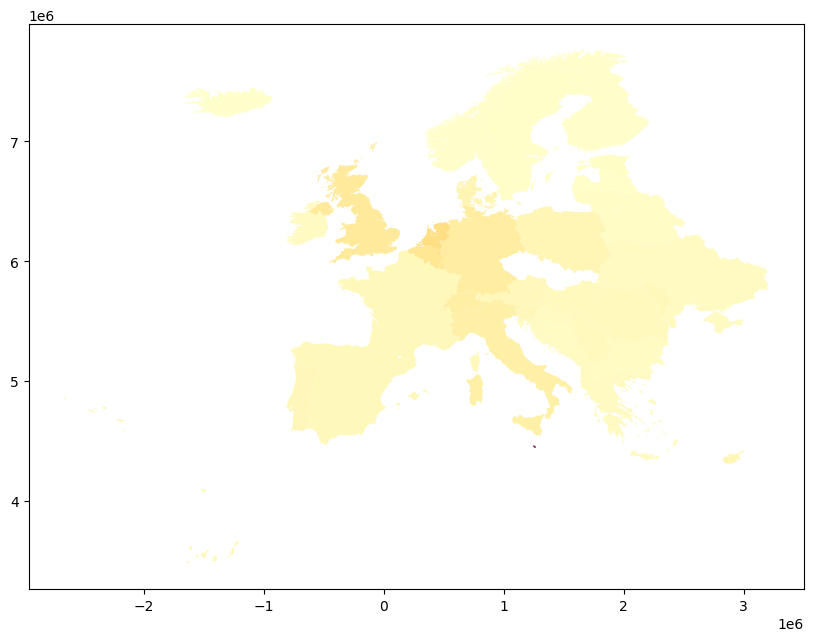

In [373]:
europe_8857.plot(europe_8857.mobiles/europe_8857.sq_km,cmap="YlOrRd")

Choropleths are great to represent normalized indicators such as:
* Densities
* Proportion
* Ratios
* Averages

This is a density:

In [374]:
europe_8857['mobiles_density']=europe_8857.mobiles/europe_8857.sq_km

### Preprocessing: Discretizing

mobiles by area is a density indicator. This is a real number (not an integer), so most of the time the color gradient might  not be that useful to reveal some pattern visually. Then, we often discretize (or bin) the indicator computed.
Now, we want to cut the variable. Run the next code to make sure you have tose packages:

In [375]:
## do you have these installed?
# ! pip show numba mapclassify numpy

Let's explore the bining algorithms:

In [376]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=europe_8857['mobiles_density']

# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [377]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

<Axes: ylabel='Classifier'>

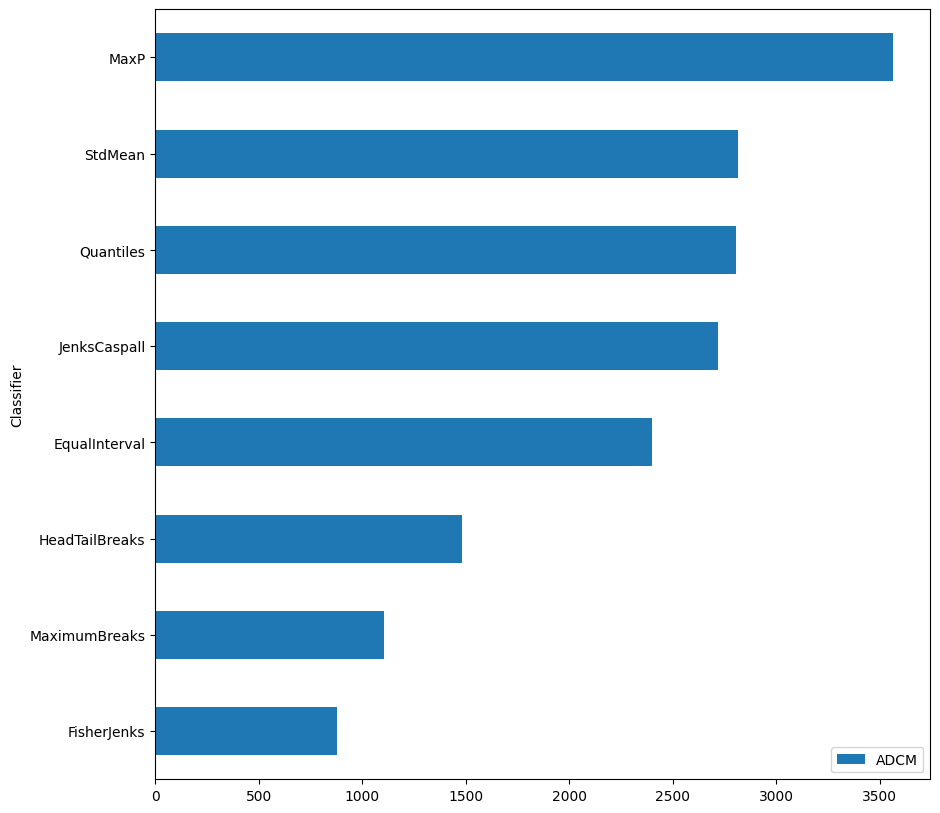

In [378]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [379]:
europe_8857['mobiles_density_FJ5'] = fj5.yb # yb will give you a numeric label

In [380]:
# there you are
europe_8857[['mobiles_density','mobiles_density_FJ5']].head(20)

,mobiles_density,mobiles_density_FJ5
4,90.788924,0
9,132.346103,1
13,396.357442,3
17,75.590367,0
20,56.840077,0
24,72.240911,0
43,154.577883,1
44,174.038149,1
49,81.966047,0
51,45.325904,0


We could create a copy of that column to add descriptive labels:

In [381]:
# renaming
newLabelsForLevels={0:"0_VeryLow", 1:"1_Low", 2:"2_Middle", 3:"3_High", 4:"4_VeryHigh"}

europe_8857['mobiles_density_FJ5_cat']=europe_8857.loc[:,'mobiles_density_FJ5'].replace(newLabelsForLevels)

# we have
europe_8857[['mobiles_density','mobiles_density_FJ5','mobiles_density_FJ5_cat']].head(20)

,mobiles_density,mobiles_density_FJ5,mobiles_density_FJ5_cat
4,90.788924,0,0_VeryLow
9,132.346103,1,1_Low
13,396.357442,3,3_High
17,75.590367,0,0_VeryLow
20,56.840077,0,0_VeryLow
24,72.240911,0,0_VeryLow
43,154.577883,1,1_Low
44,174.038149,1,1_Low
49,81.966047,0,0_VeryLow
51,45.325904,0,0_VeryLow


We are ready for a discrete choropleth:

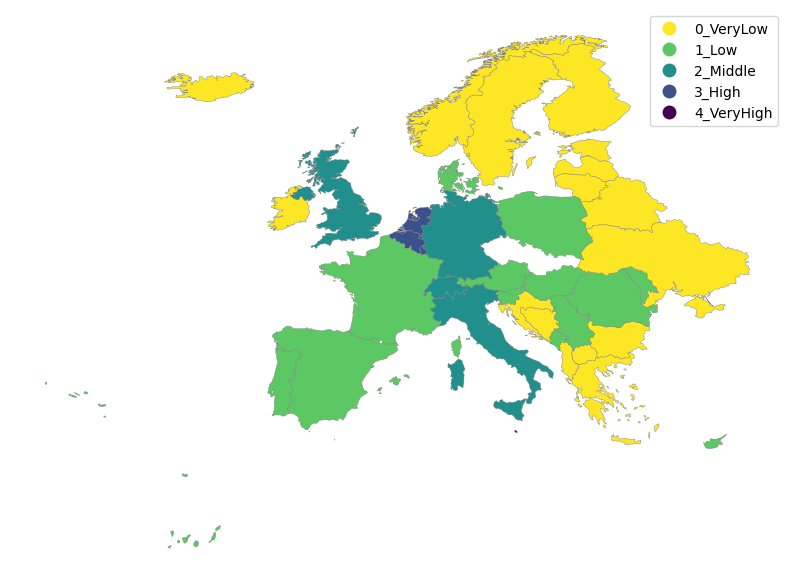

In [382]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
europe_8857.plot(column='mobiles_density_FJ5_cat', # variable to plot
                 cmap='viridis_r', # set of colors
                 categorical=True, # can be interpreted as category
                 edgecolor='grey', # border color
                 linewidth=0.3, # width of border
                 legend=True, # need a legend?
                 ax=ax
       )

ax.set_axis_off()

# Saving

Let's save these maps for R.

In [383]:
## Good practice to refresh your memory

## Find only GeoDataFrames in the current session
geodataframe_list = [var for var in globals() if isinstance(globals()[var], gpd.GeoDataFrame)]

print("List of GeoDataFrames in memory:")
for name in geodataframe_list:
    print(name)

List of GeoDataFrames in memory:
countries
_3
theMapAndData
_7
Africa
temporal_gdf
_12
_13
Africa_dots
_18
Africa_8857
Africa_dots_8857
_23
_24
Africa_8857_symbols
_28
_30
_38
_40
_41
europe
_62
_63
europe_dots
_69
europe_8857
europe_dots_8857
_74
_75
europe_8857_symbols
_80
_82
_83
_88
_95
_96
_101
_105
_110
_111
_116
_121
_122
_129
_130
_135
_140
_141
_148
_153
_156
_160
_165
_166
_171
_176
_177
_181
_183
_191
_193
_194
_215
_219
_224
_225
_230
_235
_236
_240
_242
_250
_252
_253
_272
_276
_281
_282
_287
_292
_293
_297
_299
_307
_309
_310
_328
_333
_337
_342
_343
_348
_353
_354
_358
_360
_368
_370
_371


These are the ones needed in R:

In [384]:
# for choropleth and base map
europe_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 37 entries, 4 to 156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Country                  37 non-null     object  
 1   iso2                     37 non-null     object  
 2   iso3                     37 non-null     object  
 3   region                   37 non-null     object  
 4   fragility                37 non-null     float64 
 5   co2                      37 non-null     int64   
 6   sq_km                    37 non-null     int32   
 7   num_airports             37 non-null     int32   
 8   population               37 non-null     int32   
 9   mobiles                  37 non-null     int32   
 10  geometry                 37 non-null     geometry
 11  mobiles_density          37 non-null     float64 
 12  mobiles_density_FJ5      37 non-null     int64   
 13  mobiles_density_FJ5_cat  37 non-null     object  
dtypes: float

In [385]:
# for DDMs
europe_dots_8857.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 14480 entries, 0 to 14479
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  14480 non-null  geometry
dtypes: geometry(1)
memory usage: 113.3 KB


In [386]:
# for PSMs
europe_8857_symbols.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Country          37 non-null     object  
 1   iso3             37 non-null     object  
 2   mobiles          37 non-null     int32   
 3   geometry         37 non-null     geometry
 4   size             37 non-null     float64 
 5   mobiles_outlier  37 non-null     int64   
dtypes: float64(1), geometry(1), int32(1), int64(1), object(2)
memory usage: 1.7+ KB


The file **europe_8857.gpkg** will keep all those maps as layers!

In [387]:
europe_8857.to_file("europe_8857.gpkg",driver='GPKG',layer='continent')
europe_dots_8857.to_file("europe_8857.gpkg",driver='GPKG',layer='mobiles_ddm')
europe_8857_symbols.to_file("europe_8857.gpkg",driver='GPKG',layer='mobiles_psm')

Take a look at the [Dashboard](https://dacss-spatial.github.io/The-Thematics/draft_storyboard_tabs.html)